[View in Colaboratory](https://colab.research.google.com/github/nenorden/Transfer-learning-on-Fashion-MNIST/blob/master/TSNE_Visualisation.ipynb)

In [25]:
import tensorflow as tf
print(tf.test.gpu_device_name())

# Import data


In [26]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

%matplotlib inline
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

import os

os.chdir('/content/fashion-mnist/')
import utils.mnist_reader as mnist_reader
os.chdir("/")

# train and test data
images_train, labels_train = mnist_reader.load_mnist('content/fashion-mnist/data/fashion', kind='train')
images_test, labels_test = mnist_reader.load_mnist('content/fashion-mnist/data/fashion', kind='t10k')

print(images_train.shape)

Cloning into 'fashion-mnist'...
remote: Counting objects: 609, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 609 (delta 3), reused 0 (delta 0), pack-reused 603
Receiving objects: 100% (609/609), 105.17 MiB | 62.94 MiB/s, done.
Resolving deltas: 100% (345/345), done.
(60000, 784)


# Import training and test features

In [27]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

train_file_id = '1u9MTHtqwDtHL3z6NHMP8xRJw_54Fag5T'
test_file_id = '1kkbjDm6hilfA4PFcxBgRGrN8gcGY6dmn'

# Load files by ID
os.chdir('/content/')
downloaded = drive.CreateFile({'id': train_file_id})
downloaded.GetContentFile('train_fashion-MNIST_resnet.npy')

downloaded = drive.CreateFile({'id': test_file_id})
downloaded.GetContentFile('test_fashion-MNIST_resnet.npy')

# Files should be in /content/. Check!
os.chdir('/content/')
!ls
os.chdir('/')

datalab        test_fashion-MNIST_resnet.npy
fashion-mnist  train_fashion-MNIST_resnet.npy


# Have a look at the data


y = 8 (Bag)


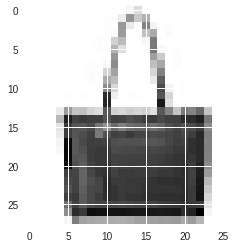

In [28]:
# Map label to clothing for convenience
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

# Map labels to colors for PCA visualization 
color_dict = {
 0: 'orange',
 1: 'gray',
 2: 'blue',
 3: 'magenta',
 4: 'cyan',
 5: 'red',
 6: 'lime',
 7: 'yellow',
 8: 'orchid',
 9: 'green'
}

# sample train image
rand_i = random.randint(0,images_train.shape[0])
sample = images_train[rand_i].reshape(28,28)
# Get label
sample_label = labels_train[rand_i]

print("y = {label_index} ({label})".format(label_index = sample_label, 
                                           label = label_dict[sample_label]))

plt.imshow(sample, cmap='Greys')
plt.show()

# Original features

## Standardize the data

In [0]:
import sklearn
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

features_orig = StandardScaler().fit_transform(images_test)

## Use PCA to reduce features to 50


In [31]:
# Fit PCA to original features
pca_orig = PCA(n_components=50) # 2D projection
pca_orig = pca_orig.fit(features_orig)
print('Variance explained by the components:', 
      pca_orig.explained_variance_ratio_)

pca_orig = pca_orig.transform(features_orig)

pca_orig_df = pd.DataFrame(data = pca_orig)
pca_orig_df.head(10) # print 10 first data instances

('Variance explained by the components:', array([0.22150194, 0.14334186, 0.05487982, 0.05102631, 0.04067312,
       0.02993439, 0.02779844, 0.02342661, 0.01745455, 0.01369979,
       0.01163369, 0.00983256, 0.00934256, 0.00863632, 0.00833105,
       0.00722679, 0.00655852, 0.00640289, 0.00625503, 0.00612849,
       0.00565202, 0.00497152, 0.00472121, 0.00460012, 0.00455826,
       0.00442114, 0.00429893, 0.00404144, 0.00393657, 0.00385121,
       0.00365149, 0.00361522, 0.00351753, 0.00342673, 0.00327613,
       0.00321498, 0.0031087 , 0.00303897, 0.0028931 , 0.00276726,
       0.00275114, 0.0026711 , 0.00259781, 0.00252776, 0.00249188,
       0.00243791, 0.00236327, 0.00227654, 0.00222517, 0.00210762]))


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-16.812930,7.211594,-2.367982,0.084275,-3.706686,1.331407,-3.130314,-3.590662,-2.866073,5.496850,...,-0.222647,-0.170281,0.318459,-0.926053,0.667096,-0.588719,0.215449,2.165183,-1.021387,0.781194
1,22.272440,9.561994,9.904578,-4.127172,-5.599125,-5.064600,-4.103505,2.565153,-1.256537,0.079706,...,2.878805,-2.243750,0.042217,-0.183214,1.019736,0.338230,-1.126153,0.289242,0.735840,0.563973
2,3.924990,-16.794870,-8.647227,-1.729656,-0.183761,-6.610197,5.337597,1.222602,-2.134154,4.512439,...,-0.501791,-0.702000,-0.260113,-0.463279,0.472205,-0.153674,-0.843180,-0.116713,-1.124982,0.047564
3,-4.979114,-16.840440,-3.656624,2.292191,-0.617801,-6.528618,5.637920,0.014134,-1.943958,3.558510,...,0.663412,-1.687347,1.277136,0.325301,0.282177,0.572882,-0.610185,0.166835,0.814361,0.484963
4,2.306663,-0.354408,5.578455,2.054605,1.306385,-0.436217,-4.477056,-0.332600,-2.769386,-0.240310,...,-1.429614,0.312989,-0.324015,0.127627,1.288126,-1.498042,0.499550,-2.275977,-0.811429,-0.421617
5,2.365551,-14.854817,-2.580305,0.333687,1.099435,-3.628444,1.284873,-1.238223,-1.116106,3.016188,...,0.656341,-0.882445,-0.810065,0.124239,1.821882,-0.887535,0.018935,-0.803972,0.369097,-0.511017
6,-11.934192,-7.288529,11.423368,2.669018,0.425467,2.073317,-0.987311,-4.274515,0.616552,-0.588876,...,0.247417,-0.654785,-1.553564,-0.253176,0.860357,-2.244067,-1.667049,0.917256,0.830969,-0.414565
7,-3.432798,-2.787951,9.707385,0.189733,-3.533977,-1.498609,1.193991,-2.694443,1.523025,-0.158759,...,1.225631,0.517293,-0.166795,1.258751,2.149360,2.185956,1.083648,0.263900,-0.546707,0.466010
8,-22.128642,-7.147404,7.307483,-1.049429,1.824965,-0.388408,0.944186,1.443166,1.228555,-2.598396,...,-0.731667,-0.074844,0.985885,1.028161,-0.330245,0.077092,-0.526153,-1.018725,1.917468,-0.151431
9,-19.618175,0.814189,1.732919,-6.529678,3.672650,0.554090,-0.039713,5.614164,2.572888,-4.501987,...,0.327039,1.392162,-1.167120,0.848306,-1.745901,0.978422,-1.862290,-0.652966,0.631445,-1.674368


## Use t-SNE to reduce dimensions to 2


In [34]:
import time

from sklearn.manifold import TSNE



time_start = time.time()
tsne_orig = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_orig_results = tsne.fit_transform(pca_orig_df)

print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

tsne_orig_resnet_df = pd.DataFrame(data = tsne_orig_results)
tsne_orig_resnet_df.head(10)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.021s...
[t-SNE] Computed neighbors for 10000 samples in 6.376s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.409437
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.495316
[t-SNE] Error after 300 iterations: 2.540798
t-SNE done! Time elapsed: 121.276

,0,1
0,6.053428,-2.506540
1,-7.970460,-6.405619
2,0.541089,10.842575
3,3.686247,8.060122
4,-2.917864,-1.894556
5,0.523678,8.880365
6,0.388480,0.990736
7,-2.037847,-0.328862
8,1.347522,-10.022562
9,4.708883,-9.092644


## Plot the data obtained from t-SNE


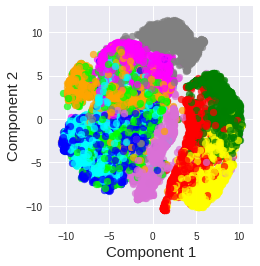

In [35]:
# Plot principal components
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_aspect('equal')
#ax.set_title('2 Component PCA on ResNet18-extracted features', fontsize = 20)

for i in range(len(tsne_orig_results)):
  ax.scatter(tsne_orig_results[i][0], tsne_orig_results[i][1], 
             color = color_dict[labels_test[i]], alpha = 0.7)

plt.show()

# ResNet features


In [15]:
os.chdir('/content/')
!ls
os.chdir('/')

%matplotlib inline
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/content/')
resnet_train = np.load('train_fashion-MNIST_resnet.npy')
resnet_test = np.load('test_fashion-MNIST_resnet.npy')
os.chdir('/')

datalab        test_fashion-MNIST_resnet.npy
fashion-mnist  train_fashion-MNIST_resnet.npy


## Standardize data


In [0]:
import sklearn
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

features_resnet = StandardScaler().fit_transform(resnet_test)

## Reduce number of features with PCA



In [20]:
pca_resnet = PCA(n_components=50) # 2D projection
pca_resnet = pca_resnet.fit(features_resnet)
print('Variance explained by the two components: \n', 
      pca_resnet.explained_variance_ratio_)
pca_resnet = pca_resnet.transform(features_resnet)

pca_resnet_df = pd.DataFrame(data = pca_resnet)
pca_resnet_df.head(10)


('Variance explained by the two components: \n', array([0.02660286, 0.0148432 , 0.01273873, 0.00785521, 0.00711863,
       0.00677099, 0.00611411, 0.00522705, 0.00481287, 0.00429501,
       0.00408579, 0.0039185 , 0.00378224, 0.00368261, 0.00348589,
       0.0034208 , 0.00336097, 0.00331267, 0.00327946, 0.00319147,
       0.00316086, 0.00305232, 0.00304415, 0.0030121 , 0.00300421,
       0.00295019, 0.00290278, 0.00283704, 0.00280093, 0.00279433,
       0.00276507, 0.0027435 , 0.00271298, 0.00268287, 0.00265097,
       0.0026397 , 0.00262378, 0.00261565, 0.00260514, 0.00258959,
       0.00257624, 0.00255501, 0.00252464, 0.00251487, 0.00249976,
       0.00248026, 0.00247826, 0.00246816, 0.00244718, 0.00242566],
      dtype=float32))


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,7.436506,-0.312493,-3.077443,3.134808,0.167275,-0.693810,-0.272962,0.698134,0.243373,0.347948,...,-1.247136,-0.597676,-0.442248,-0.049748,1.998954,1.006209,-0.570016,-0.136028,-0.219830,1.189434
1,-5.491250,-2.933233,2.973933,0.890776,0.183507,-2.777445,-1.474424,-1.744108,-2.861029,-1.113804,...,-3.651423,0.838561,-1.269660,-1.107578,3.080417,-0.110566,-0.503588,-1.679597,0.114720,1.450112
2,-1.461529,5.003457,-0.274040,3.441006,1.434285,-1.577330,-2.023102,1.084327,1.692109,-0.737391,...,-0.175304,-0.252783,1.501969,1.085262,0.321557,0.624752,0.438845,1.164880,0.334692,-0.464492
3,-0.633141,6.759012,0.814939,0.795334,-0.354889,-0.861884,0.495347,-0.220779,-1.683369,-0.260294,...,-0.843428,2.953231,0.907868,0.266575,1.338030,-0.677623,-0.786959,0.422675,0.459517,0.435763
4,-2.251143,-1.401333,-2.337668,-0.373718,2.324663,0.393886,-0.696110,1.400469,0.436151,1.134492,...,0.940449,0.695205,-2.738972,0.243702,0.266822,1.113590,-0.363178,0.552166,-0.805668,1.394992
5,-2.025562,5.875877,0.149912,2.577952,0.850823,0.099166,-0.329206,0.114125,1.323025,0.376690,...,-0.939648,0.593116,1.576483,-1.337239,-0.641275,1.973320,0.607010,-0.378915,-2.293706,-0.056763
6,-1.459790,-1.445833,-0.894282,-1.671237,-0.912309,-1.911403,-1.141917,-1.132242,-1.124841,1.637469,...,1.596660,0.925865,-0.131701,0.379353,-2.031601,-0.966357,0.014660,-1.034844,-2.198756,0.816588
7,-1.611510,-0.334642,-1.209189,-0.701375,-1.425371,-2.051072,1.019718,0.378813,3.318506,-0.089323,...,-0.569719,-1.025272,0.334508,-0.282521,0.485831,0.314808,1.425234,-0.480439,0.149707,-2.875454
8,5.824293,1.438096,1.330738,-3.979008,2.127340,0.328470,-2.749615,-0.079190,0.039085,2.761010,...,0.304999,1.357675,-1.661690,2.268410,0.087463,0.658475,-1.575047,1.320405,-0.050067,0.922376
9,8.520095,-0.468892,2.689400,-3.066860,0.920178,1.051682,0.283508,-0.107484,-0.640879,-2.269098,...,0.340245,1.251790,0.734774,-1.886611,0.004766,-1.688964,-0.239600,-0.103728,0.454397,-2.028429


## t-SNE

In [23]:
import time

from sklearn.manifold import TSNE



time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_resnet_df)

print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

tsne_resnet_df = pd.DataFrame(data = tsne_results)
tsne_resnet_df.head(10)



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.025s...
[t-SNE] Computed neighbors for 10000 samples in 11.376s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.719643
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.868286
[t-SNE] Error after 300 iterations: 3.280149
t-SNE done! Time elapsed: 139.85

NameError: ignored

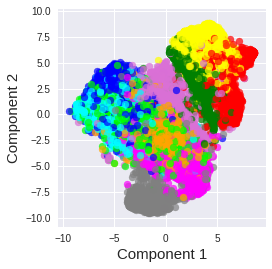

In [22]:
# Plot principal components
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_aspect('equal')
#ax.set_title('2 Component PCA on ResNet18-extracted features', fontsize = 20)

for i in range(len(tsne_results)):
  ax.scatter(tsne_results[i][0], tsne_results[i][1], 
             color = color_dict[labels_test[i]], alpha = 0.7)

plt.show()